In [1]:
# chris messenger and I thought about making a gaussian
# of increased sample-weights around the merger

# also to try dropout

In [266]:
# just try 1D for now

# my conclusion is that have >1 sample weight around merger didn't really help things
# strangly it seemed to produce better results for inspiral too...?

# bit confusing

# no obvious reason to use this.

# compared resnets with plain networks
# resnets trained faster but all networks performed about as well as each other, provided sufficient training.

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

import pickle

In [4]:
from tqdm import tqdm

In [5]:
pkl_filename = "pre_processing/times_scaler.pkl"
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

In [6]:
times_scaler

MinMaxScaler(feature_range=(-1, 1))

In [7]:
times = np.load("training_data/times.npy")

In [8]:
times_scaled = times_scaler.transform(times[:, np.newaxis])[:, 0]

In [9]:
times

array([-499.50442803, -499.00442803, -498.50442803, ...,   48.49557197,
         48.99557197,   49.49557197])

In [10]:
times_scaled

array([-1.        , -0.99817851, -0.99635701, ...,  0.99635701,
        0.99817851,  1.        ])

In [11]:
times.shape

(1099,)

In [12]:
times_scaled.shape

(1099,)

In [13]:
amps = np.load("training_data/amplitude.npy")
# amps = np.load("validation_data/amplitude.npy")
amp_processing_params = np.load("pre_processing/amp_preprocessing_params.npz")

# amps = np.load("training_data/phase.npy")
# amp_processing_params = np.load("pre_processing/phase_preprocessing_params.npz")

In [14]:
amps.shape

(500, 1099)

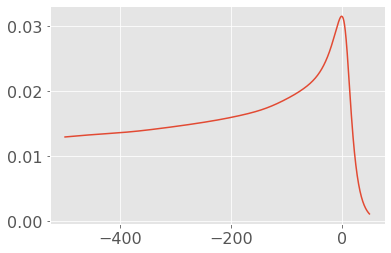

In [15]:
plt.figure()
plt.plot(times, amps[0])

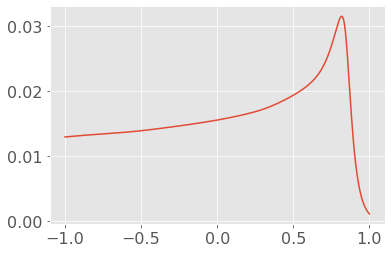

In [16]:
plt.figure()
plt.plot(times_scaled, amps[0])

In [17]:
list(amp_processing_params)

['mean', 'max']

In [18]:
amp_processing_params['mean']

array([[0.01255005, 0.01255297, 0.01255593, ..., 0.00125779, 0.00120668,
        0.00115758]])

In [19]:
amp_processing_params['mean'].shape

(1, 1099)

In [20]:
amp_processing_params['max']

array(0.00714663)

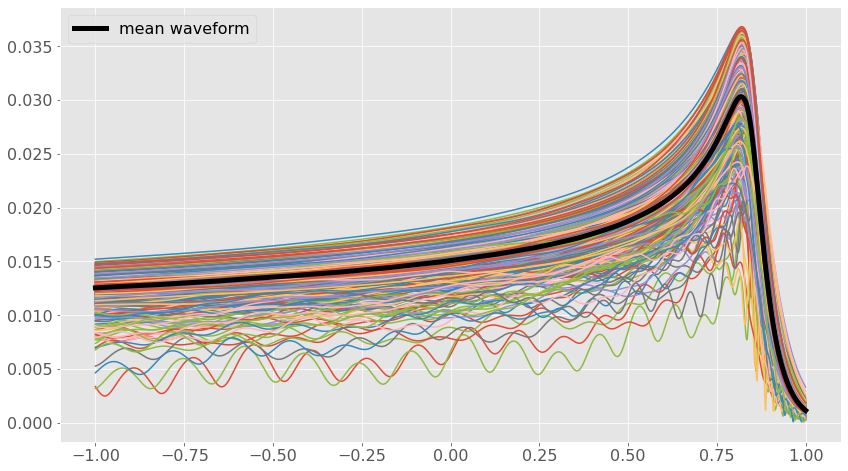

In [21]:
plt.figure(figsize=(14, 8))
for y in amps:
    plt.plot(times_scaled, y)
    
plt.plot(times_scaled, amp_processing_params['mean'][0], label='mean waveform', lw=5, c='k')
plt.legend()

In [22]:
import compute_preprocessing

In [23]:
amps_scaled = compute_preprocessing.apply_pre_process_forward(amps, amp_processing_params['mean'], amp_processing_params['max'])

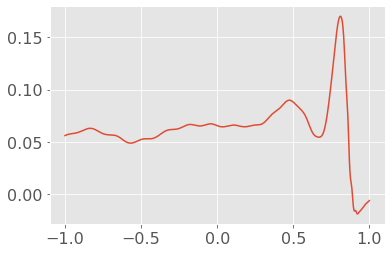

In [24]:
plt.figure()
plt.plot(times_scaled, amps_scaled[0])

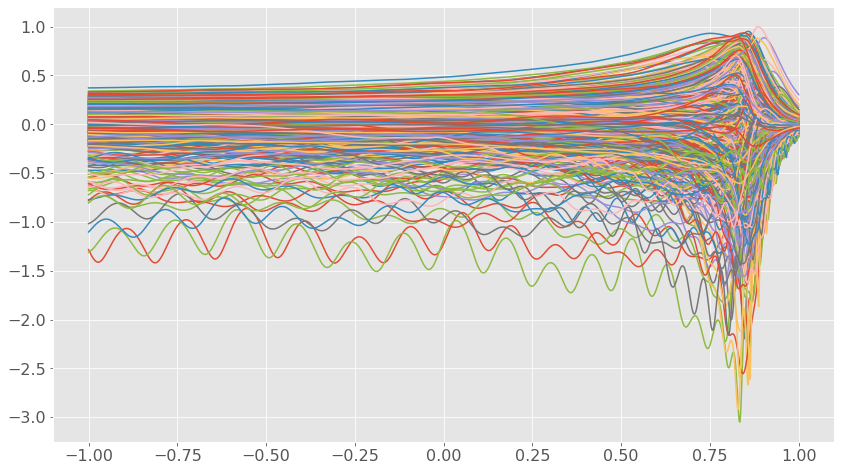

In [25]:
plt.figure(figsize=(14, 8))
for y in amps_scaled:
    plt.plot(times_scaled, y)
#     plt.plot(times, y)
# plt.xlim(-100, 100)

In [26]:
amps_scaled_reverse = compute_preprocessing.apply_pre_process_reverse(amps_scaled, amp_processing_params['mean'], amp_processing_params['max'])

In [27]:
np.testing.assert_array_almost_equal(amps, amps_scaled_reverse)

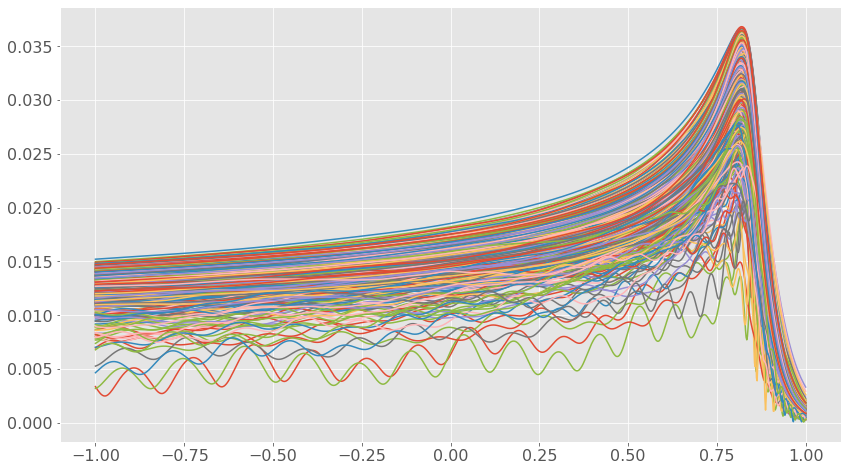

In [28]:
plt.figure(figsize=(14, 8))
for y in amps_scaled_reverse:
    plt.plot(times_scaled, y)

# setting up the domain

In [29]:
coords = np.load("training_data/coords.npy")
# coords = np.load("validation_data/coords.npy")

In [30]:
times.shape

(1099,)

In [31]:
coords.shape

(3, 500)

In [32]:
amps.shape

(500, 1099)

In [33]:
np.outer(coords, times).shape

(1500, 1099)

In [34]:
(times[:, np.newaxis]*coords[0]).shape

(1099, 500)

In [35]:
1099 * 3

3297

In [36]:
def convert_input_for_ann(times, q, chi1, theta1):
    X = []
    for _q, _chi1, _theta1 in zip(q, chi1, theta1):
        for t in times:
            X.append([t, _q, _chi1, _theta1])
    X = np.asarray(X)
    return X

In [37]:
X = convert_input_for_ann(times_scaled, coords[0], coords[1], coords[2])

In [38]:
y = amps.ravel()
print(y.shape)

# X = []


# # for b,c,d in coords.T:

# bb = coords[0]
# cc = coords[1]
# dd = coords[2]

# for b,c,d in zip(bb,cc,dd):
#     for a in times_scaled:
# #         print(a,b,c,d)
#         X.append([a,b,c,d])
# X = np.asarray(X)

(549500,)


In [39]:
# coords[0]

In [40]:
# coords[1]

In [41]:
# coords[2]*180/np.pi

In [42]:
X.shape

(549500, 4)

In [43]:
X[2]

array([-0.99635701,  2.03547937,  0.2632761 ,  1.29650135])

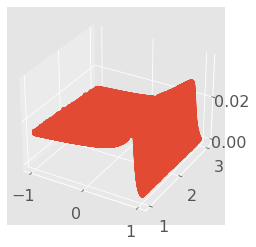

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)

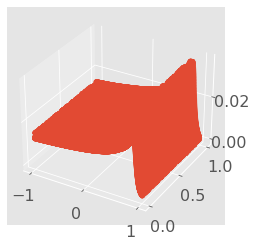

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,2], y)

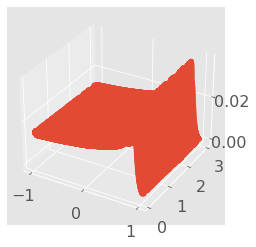

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,3], y)

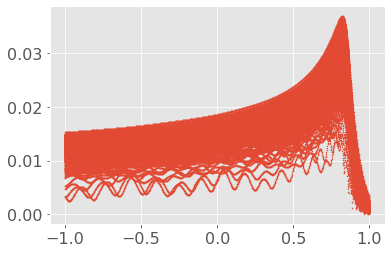

In [47]:
plt.figure()
plt.scatter(X[:,0], y, s=1)

In [48]:
X.shape

(549500, 4)

In [49]:
y.shape

(549500,)

# just take one waveform

In [52]:
np.where((coords[1] > 0.9) & (coords[2] > 1.3) & (coords[2] < 1.7))

(array([ 27, 124, 221, 472, 488]),)

In [55]:
print(f"q = {coords[0][27]}")
print(f"chi = {coords[1][27]}")
print(f"theta = {coords[2][27]}")

q = 1.9367469229026408
chi = 0.9819890866437324
theta = 1.5303168470191282


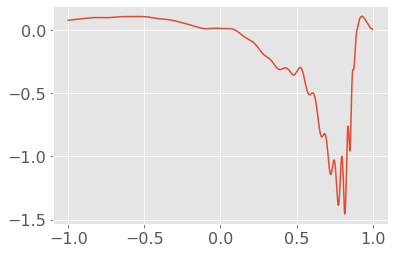

In [53]:
plt.figure()
plt.plot(times_scaled, amps_scaled[27])

In [56]:
times_scaled.shape

(1099,)

In [57]:
X = times_scaled[:, np.newaxis].copy()

In [59]:
amps_scaled[27].shape

(1099,)

In [93]:
y = amps_scaled[27][:, np.newaxis].copy()

In [94]:
X.shape

(1099, 1)

In [95]:
y.shape

(1099, 1)

In [96]:
sample_weight = np.ones(shape=y.shape)

In [97]:
sample_weight.shape

(1099, 1)

In [98]:
# mask around peak with a gaussian

In [99]:
from scipy.stats import norm

In [100]:
norm(loc=0, scale=1).pdf(times)

array([0., 0., 0., ..., 0., 0., 0.])

In [187]:
sample_weight_scale = norm(loc=-40, scale=50).pdf(times)*10000

In [188]:
sample_weight_final = sample_weight[:,0] + sample_weight_scale
sample_weight_final = sample_weight_final[:,np.newaxis]

In [189]:
sample_weight_final

array([[ 1.        ],
       [ 1.        ],
       [ 1.        ],
       ...,
       [17.66124863],
       [17.36813517],
       [17.07857038]])

In [190]:
sample_weight_final.shape

(1099, 1)

In [191]:
norm(loc=-40, scale=50).pdf(times)

array([3.64903058e-21, 4.00007225e-21, 4.38444614e-21, ...,
       1.66612486e-03, 1.63681352e-03, 1.60785704e-03])

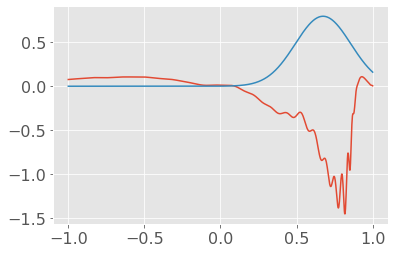

In [192]:
plt.figure()
plt.plot(times_scaled, amps_scaled[27])
plt.plot(times_scaled, sample_weight_scale/100)

In [193]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [194]:
import tensorflow_addons as tfa

In [242]:
def build_base_model(input_shape, output_shape, width, depth):
    inputs = keras.Input(shape=(input_shape,))

    x = layers.Dense(width, 'relu')(inputs)
    for i in range(depth):
        x = layers.Dense(width, 'relu')(x)

    outputs = layers.Dense(output_shape)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name=f"base_model")

    return model

In [243]:
model_base = build_base_model(input_shape=X.shape[1], output_shape=y.shape[1], width=128, depth=3)
model_base.compile(loss='mse', optimizer='adam')

In [244]:
%%time
# callbacks = []
# callbacks.append(tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=50, min_lr=1e-5))
# history_base = model_base.fit(X, y, epochs=500, batch_size=500, verbose=0, validation_split=0.2, callbacks=callbacks)

history_base = model_base.fit(X, y, epochs=10000, batch_size=X.shape[0], verbose=0)

CPU times: user 6min 8s, sys: 47.2 s, total: 6min 56s
Wall time: 1min 10s


In [245]:
model_sw = build_base_model(input_shape=X.shape[1], output_shape=y.shape[1], width=128, depth=3)
model_sw.compile(loss='mse', optimizer='adam')

In [246]:
%%time
# callbacks = []
# callbacks.append(tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=50, min_lr=1e-5))
# history_sw = model_sw.fit(X, y, epochs=500, batch_size=500, verbose=0, sample_weight=sample_weight_final, validation_split=0.2, callbacks=callbacks)


history_sw = model_sw.fit(X, y, epochs=10000, batch_size=X.shape[0], verbose=0, sample_weight=sample_weight_final)

CPU times: user 6min 11s, sys: 44.6 s, total: 6min 55s
Wall time: 1min 10s


In [247]:
import wispy.resnet 

In [248]:
resnet_model_base = wispy.resnet.ResNet(
    input_shape=X.shape[1],
    output_shape=y.shape[1],
    width=64,
    num_blocks=3,
    batch_norm=False
)
resnet_model_base.compile(loss='mse', optimizer='adam')

In [249]:
%%time
history_resnet_base = resnet_model_base.fit(X, y, epochs=10000, batch_size=X.shape[0], verbose=0)

CPU times: user 16min 37s, sys: 3min 17s, total: 19min 54s
Wall time: 3min 39s


In [250]:
resnet_model_sw = wispy.resnet.ResNet(
    input_shape=X.shape[1],
    output_shape=y.shape[1],
    width=64,
    num_blocks=3,
    batch_norm=False
)
resnet_model_sw.compile(loss='mse', optimizer='adam')

In [251]:
%%time
history_resnet_sw = resnet_model_sw.fit(X, y, epochs=10000, batch_size=X.shape[0], verbose=0, sample_weight=sample_weight_final)

CPU times: user 16min 33s, sys: 3min 11s, total: 19min 45s
Wall time: 3min 38s


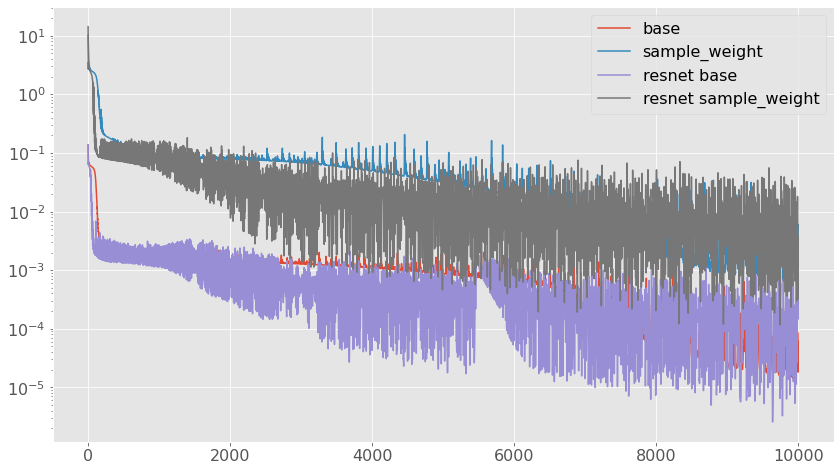

In [265]:
plt.figure(figsize=(14, 8))
plt.plot(history_base.history['loss'], label='base')
plt.plot(history_sw.history['loss'], label='sample_weight')

plt.plot(history_resnet_base.history['loss'], label='resnet base')
plt.plot(history_resnet_sw.history['loss'], label='resnet sample_weight')

plt.yscale('log')
plt.legend()

In [253]:
# plt.figure()
# plt.plot(history_base.history['lr'], label='base')
# plt.plot(history_sw.history['lr'], label='sample_weight')
# plt.yscale('log')
# plt.legend()

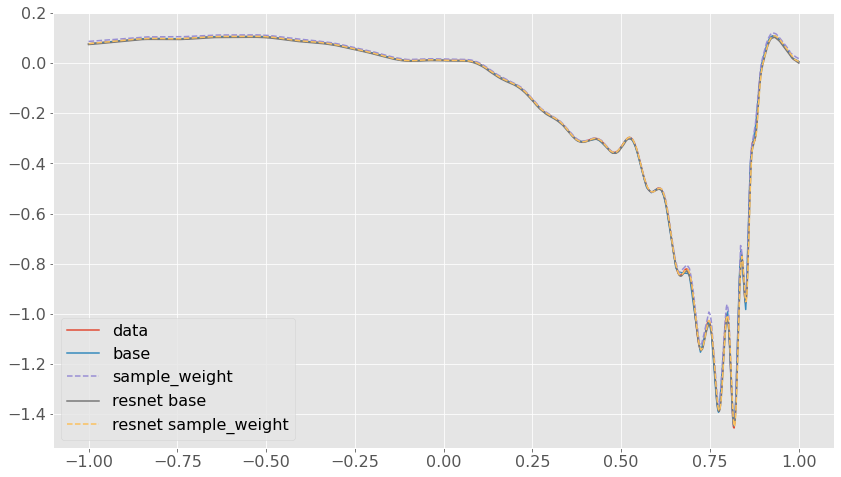

In [274]:
plt.figure(figsize=(14, 8))
plt.plot(X, y, label='data')
plt.plot(X, model_base.predict(X), label='base')
plt.plot(X, model_sw.predict(X), label='sample_weight', ls='--')


plt.plot(X, resnet_model_base.predict(X), label='resnet base')
plt.plot(X, resnet_model_sw.predict(X), label='resnet sample_weight', ls='--')
plt.legend()

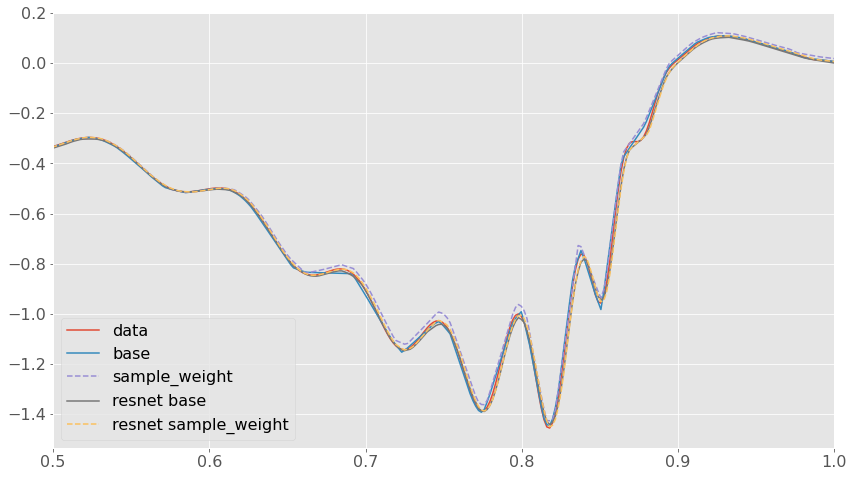

In [273]:
plt.figure(figsize=(14, 8))
plt.plot(X, y, label='data')
plt.plot(X, model_base.predict(X), label='base')
plt.plot(X, model_sw.predict(X), label='sample_weight', ls='--')


plt.plot(X, resnet_model_base.predict(X), label='resnet base')
plt.plot(X, resnet_model_sw.predict(X), label='resnet sample_weight', ls='--')
plt.xlim(0.5, 1)
plt.legend()

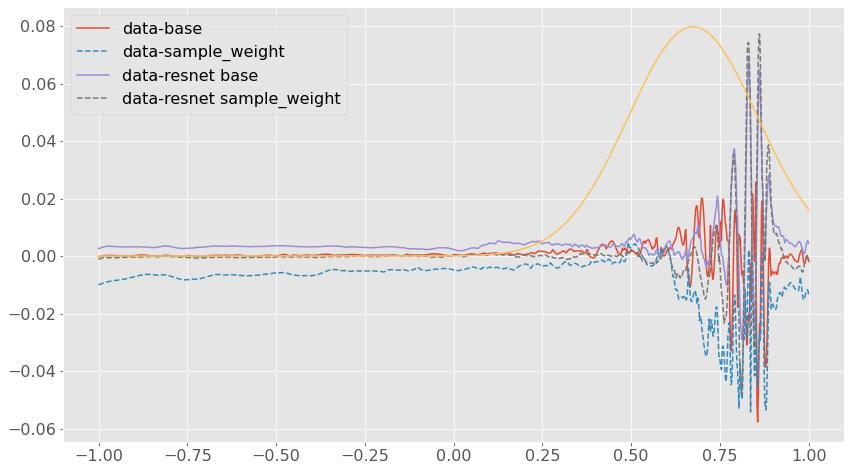

In [275]:
plt.figure(figsize=(14, 8))
plt.plot(X, y-model_base.predict(X), label='data-base')
plt.plot(X, y-model_sw.predict(X), label='data-sample_weight', ls='--')

plt.plot(X, y-resnet_model_base.predict(X), label='data-resnet base')
plt.plot(X, y-resnet_model_sw.predict(X), label='data-resnet sample_weight', ls='--')

plt.plot(times_scaled, sample_weight_scale/1000)
plt.legend()

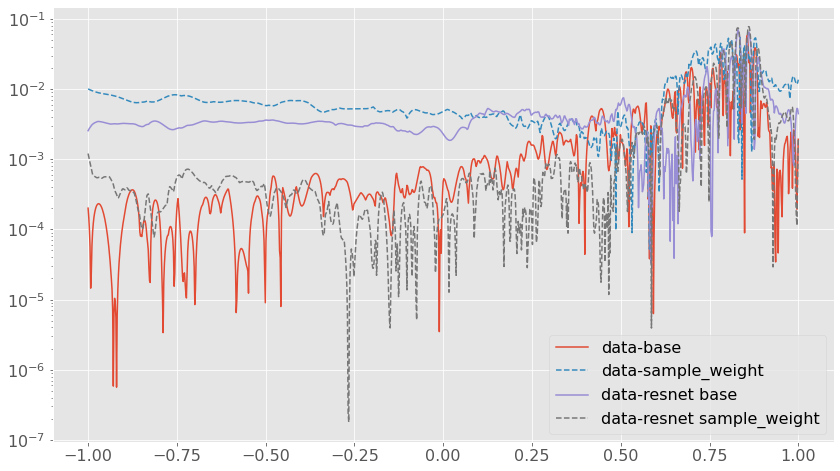

In [267]:
plt.figure(figsize=(14, 8))
plt.plot(X, np.abs(y-model_base.predict(X)), label='data-base')
plt.plot(X, np.abs(y-model_sw.predict(X)), label='data-sample_weight', ls='--')

plt.plot(X, np.abs(y-resnet_model_base.predict(X)), label='data-resnet base')
plt.plot(X, np.abs(y-resnet_model_sw.predict(X)), label='data-resnet sample_weight', ls='--')

# plt.plot(times_scaled, sample_weight_scale/100)
# plt.xlim(0.5, 1)
plt.legend()
plt.yscale('log')